# Sentence Processing with NLTK

In [133]:
import nltk
import IPython.core.display as disp

# Run the following line the first time you run this script
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/sebastian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Perform Part-of-Speech (POS) Tagging

In [134]:
def tag_sentence(sentence):
    tokenized = nltk.word_tokenize(sentence)
    tagged = nltk.pos_tag(tokenized)
    return tagged

input_sentence = "Go over to the kitchen and find a big red apple"
tagged_sentence = tag_sentence(input_sentence)
print(tagged_sentence)

[('Go', 'VB'), ('over', 'IN'), ('to', 'TO'), ('the', 'DT'), ('kitchen', 'NN'), ('and', 'CC'), ('find', 'VB'), ('a', 'DT'), ('big', 'JJ'), ('red', 'JJ'), ('apple', 'NN')]


## Create a Grammar and Parse the Sentence

(S
  (VP Go/VB over/IN to/TO (NP the/DT kitchen/NN))
  and/CC
  (VP find/VB (NP a/DT big/JJ red/JJ apple/NN)))


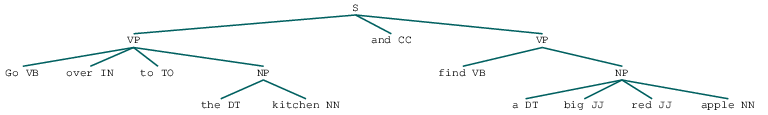

In [135]:
grammar = """
          NP: {<DT>* <JJ>* <NN>*}              # Noun phrase
          VP: {<V.*> <IN|TO|RB|RP>* <NP|PP>*}  # Verb phrase
          """
chunk_parser = nltk.RegexpParser(grammar)

input_sentence = "Go over to the kitchen and find a big red apple"
tagged_sentence = tag_sentence(input_sentence)
tree = chunk_parser.parse(tagged_sentence)

print(tree)
disp.display(tree)

## Extract information from the parse tree

In [136]:
def extract_information(tree):
    """ 
    Extracts information (actions and targets) from a tagged and chunked sentence
    """

    actions = []
    targets = []

    # Loop through all the trees
    for elem in tree:
        action = None
        target = None

        # Get the label of the subtree or token
        if isinstance(elem, nltk.tree.Tree):
            label = elem.label()
        elif isinstance(elem, tuple):
            label = elem[1]

        # Once a verb phrase is found, pick out the first verb
        if label == "VP":
            leaves = elem.leaves()
            for (word, label) in leaves:
                if "VB" in label and action is None:
                    action = word
                    break
            
            # Now find the first noun phrase and pick out the first noun
            for st in elem.subtrees():
                if st.label() == "NP":
                    leaves = st.leaves()
                    for (word, label) in leaves:
                        if "NN" in label and target is None:
                            target = word
                            break
        
        # If an action and/or target is found, append it to the list
        if action is not None or target is not None:
            actions.append(action)
            targets.append(target)

    return actions, targets


(actions, targets) = extract_information(tree)
print("Input sentence:  {}".format(input_sentence))
print("Actions:         {}".format(actions))
print("Targets:         {}".format(targets))

Input sentence:  Go over to the kitchen and find a big red apple
Actions:         ['Go', 'find']
Targets:         ['kitchen', 'apple']


## Test on Multiple Sentences

Input sentence:  Go over to the kitchen and find a big red apple.


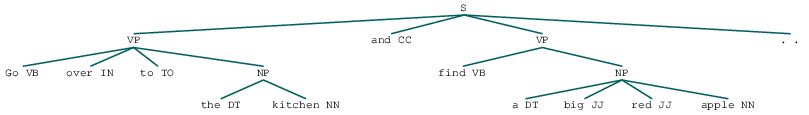

Actions:         ['Go', 'find']
Targets:         ['kitchen', 'apple']

Input sentence:  Open the refrigerator and grab a cold water bottle.


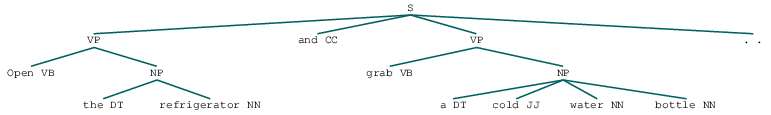

Actions:         ['Open', 'grab']
Targets:         ['refrigerator', 'water']

Input sentence:  Proceed to the garage and empty out the trash.


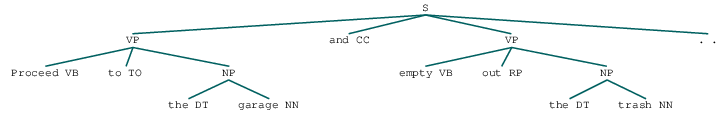

Actions:         ['Proceed', 'empty']
Targets:         ['garage', 'trash']



In [139]:
input_doc = "Go over to the kitchen and find a big red apple. " \
            "Open the refrigerator and grab a cold water bottle. " \
            "Proceed to the garage and empty out the trash."
sentences = nltk.sent_tokenize(input_doc)

for sent in sentences:
    tagged_sentence = tag_sentence(sent)
    tree = chunk_parser.parse(tagged_sentence)
    (actions, targets) = extract_information(tree)
    print("Input sentence:  {}".format(sent))
    disp.display(tree)
    print("Actions:         {}".format(actions))
    print("Targets:         {}".format(targets))
    print("")